In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST("", train=True, download=True, 
                      transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, 
                      transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # full conntcted layer with input 784(flatten from 28*28)
        # we will make three hidden layer with 64, so output will be 64
        # final output will be 10
        self.fc1 = nn.Linear(784, 64)    # input layer
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)    # output layer 
        
    def forward(self, x):
        # pass data through all layer with activation function
        # and 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [2]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)    # lr = learning rate, 0.001 = 1e-3

epochs = 5

for epoch in range(epochs):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.0975, grad_fn=<NllLossBackward>)
tensor(0.0134, grad_fn=<NllLossBackward>)
tensor(0.0738, grad_fn=<NllLossBackward>)
tensor(0.0067, grad_fn=<NllLossBackward>)
tensor(0.0401, grad_fn=<NllLossBackward>)


In [3]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for i, ele in enumerate(output):
            if torch.argmax(ele) == y[i]:
                correct += 1
            total += 1
            
print(f"ACC -> {round(correct/total, 3)}%")

ACC -> 0.979%


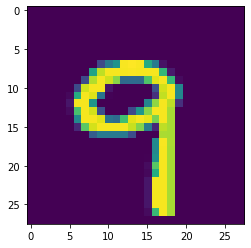

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28, 28))

In [5]:
print(torch.argmax(net(X.view(-1, 28*28))[0]))

tensor(9)
